c:\Users\user\Anaconda3\envs\sim_search\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
c:\Users\user\Anaconda3\envs\sim_search\lib\site-packages\scipy\optimize\optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Optimized Parameters: [ 0.1   0.01  0.1  -0.5   0.01]


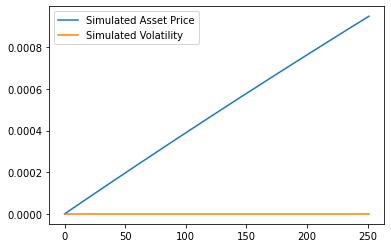

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Simulate Heston model paths
def heston_model(params, n_steps, dt):
    kappa, theta, sigma, rho, v0 = params
    sqrt_dt = np.sqrt(dt)

    # Initialize arrays to store simulated paths
    asset_paths = np.zeros(n_steps)
    volatility_paths = np.zeros(n_steps)

    # Generate paths using Euler's method
    for i in range(1, n_steps):
        dW1 = np.random.normal(0, sqrt_dt)
        dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, sqrt_dt)

        asset_paths[i] = asset_paths[i - 1] + kappa * (theta - asset_paths[i - 1]) * dt + np.sqrt(volatility_paths[i - 1]) * dW1
        volatility_paths[i] = np.maximum(0, volatility_paths[i - 1] + sigma * np.sqrt(volatility_paths[i - 1]) * dW2)

    return asset_paths, volatility_paths

# Objective function for optimization (negative log-likelihood)
def objective_function(params, returns, dt):
    kappa, theta, sigma, rho, v0 = params
    n_steps = len(returns)

    # Simulate Heston model paths
    asset_paths, volatility_paths = heston_model(params, n_steps, dt)

    # Align lengths of returns and simulated data
    returns = returns[:n_steps - 1]

    # Add a small constant to avoid division by zero
    epsilon = 1e-8

    # Calculate log-likelihood
    log_likelihood = -0.5 * np.sum(np.log(volatility_paths[1:]) + (returns - asset_paths[:-1])**2 / (volatility_paths[:-1] + epsilon))

    return -log_likelihood

# Example using historical stock returns
# Replace this with your own data
np.random.seed(42)
n_steps = 252  # Number of trading days
dt = 1 / 252.0  # Time step
returns = np.random.normal(0, 0.01, n_steps)  # Replace with your own historical returns

# Initial parameter guesses
initial_params = [0.1, 0.01, 0.1, -0.5, 0.01]

# Optimize the parameters
result = minimize(objective_function, initial_params, args=(returns, dt), method='Nelder-Mead')

# Extract optimized parameters
optimal_params = result.x
print("Optimized Parameters:", optimal_params)

# Simulate Heston model paths with optimized parameters
simulated_asset_paths, simulated_volatility_paths = heston_model(optimal_params, n_steps, dt)

# Plot results
plt.plot(simulated_asset_paths, label='Simulated Asset Price')
plt.plot(simulated_volatility_paths, label='Simulated Volatility')
plt.legend()
plt.show()
